<a href="https://colab.research.google.com/github/Ds2023/Machine_Learning_Algoz_Implementation/blob/main/linear_and_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importation of necessary variables**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
data = pd.read_csv("/content/insurance.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.shape

(1338, 7)

In [ ]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [ ]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

**Simple EDA**

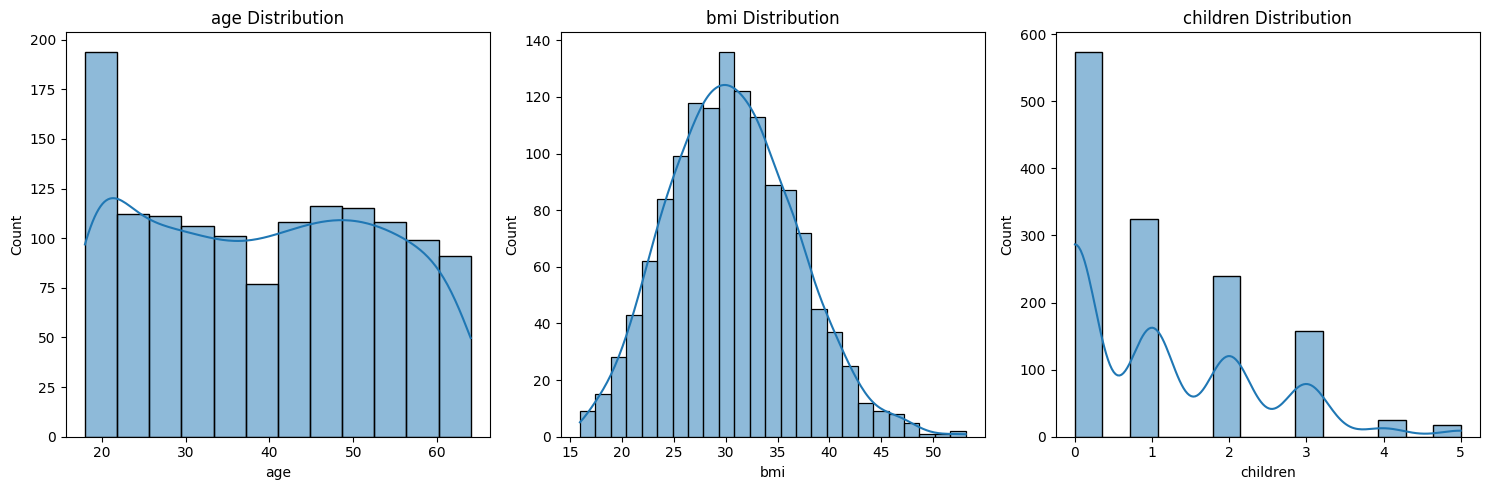

In [ ]:
columns_to_plot = ['age', 'bmi', 'children']

# Setting up subplots
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(15, 5))

# Loop through columns and plot the distribution
for i, col in enumerate(columns_to_plot):
    sns.histplot(data[col], ax=axes[i], kde=True)
    axes[i].set_title(col + ' Distribution')

plt.tight_layout()
plt.show()

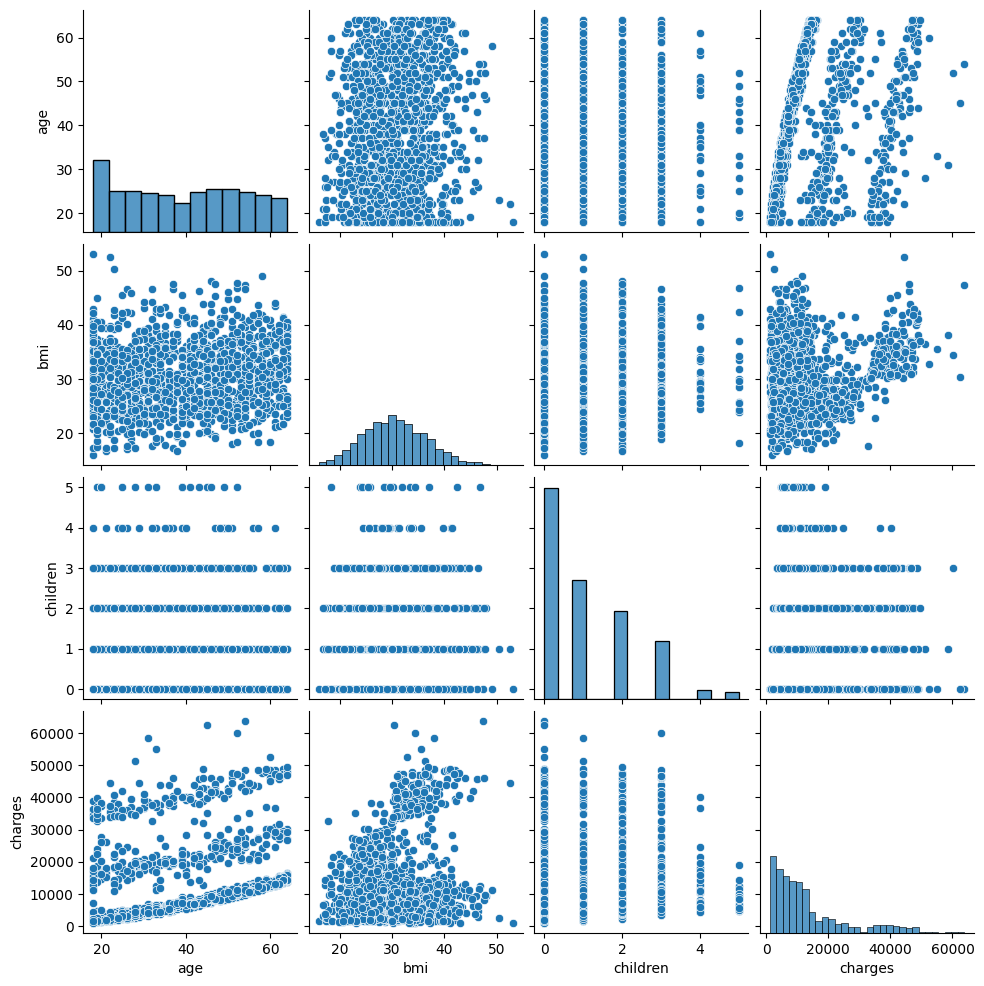

In [ ]:
sns.pairplot(data)

**Encoding**

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

In [ ]:
encoded_data = encoder.fit_transform(data[['sex','smoker','region']])

In [ ]:
encoded_data

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [ ]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['sex','smoker','region']))

In [ ]:
encoded_df

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X = data.drop(columns='charges')
y = data['charges']

In [ ]:
X.drop(columns=['sex','smoker','region'],inplace=True)

In [ ]:
# Concatenate the original DataFrame with the encoded DataFrame
encoded_data = pd.concat([X, encoded_df], axis=1)

In [ ]:
encoded_data.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


**Split the Training and Test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(encoded_data, y, test_size=0.25, random_state = 1)

In [ ]:
print(f" Training set : {X_train.shape}")
print(f" Testing set  :  {X_test.shape}")

 Training set : (1003, 11)
 Testing set  :  (335, 11)


**Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Modelling and Evaluation**

**Simple linear regression model**

In [ ]:
lin_model = LinearRegression()

In [ ]:
lin_model.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
# Coefficients
coefficients = lin_model.coef_
intercept = lin_model.intercept_
print(f"Coefficients : {coefficients}")
print(f"Intercept : {intercept}")

Coefficients : [ 3519.74501591  1982.26220755   435.18181549    67.26916951
   -67.26916951 -4917.89665397  4917.89665397   193.76438141
    91.96802545  -182.98544845   -94.2720598 ]
Intercept : 13415.959004096709


In [ ]:
lin_train_pred = lin_model.predict(X_train_scaled)
mean_squared_error(y_train, lin_train_pred)

36819261.9405177

In [ ]:
mean_absolute_error(y_train,lin_train_pred)

4185.739627684975

**Prediction and Evaluation on linear model**

In [ ]:
lin_pred = lin_model.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(y_test, lin_pred)
mae = mean_absolute_error(y_test, lin_pred)
print(f"Linear Model Error(MSE) : {mse}")
print(f"Linear Model Error(MAE) : {mae}")

Linear Model Error(MSE) : 35791108.68765433
Linear Model Error(MAE) : 4018.468655222192


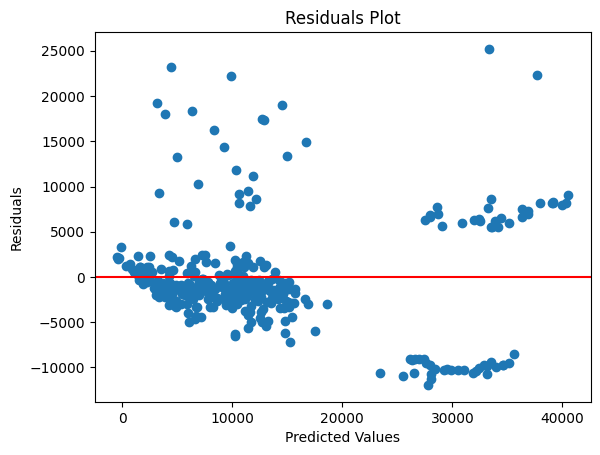

In [ ]:
residuals = y_test - lin_pred

# Plot residuals against predicted values
plt.scatter(lin_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

**Polynomial Regression**

In [ ]:
degrees = [1,2,3,4,5]  # Various degrees to try

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train_scaled)
    X_poly_test = poly.transform(X_test_scaled)

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Make predictions
    y_pred = model.predict(X_poly_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f'Degree {degree}: MSE = {mse}')
    print(f'Degree {degree}: MAE = {mae}')

Degree 1: MSE = 35765590.839660875
Degree 1: MAE = 4011.8753382469536
Degree 2: MSE = 21347985.614584878
Degree 2: MAE = 2747.5772252238808
Degree 3: MSE = 24834428.3556756
Degree 3: MAE = 3011.6536398507465
Degree 4: MSE = 35556918.36608814
Degree 4: MAE = 3906.8459392537316
Degree 5: MSE = 116841240.37189226
Degree 5: MAE = 5347.120763462687


In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
poly.fit(X_poly_train, y_train)
lin = LinearRegression()
lin.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin.predict(X_test_poly)
mean_absolute_error(y_test, y_pred)

2747.5772252238808

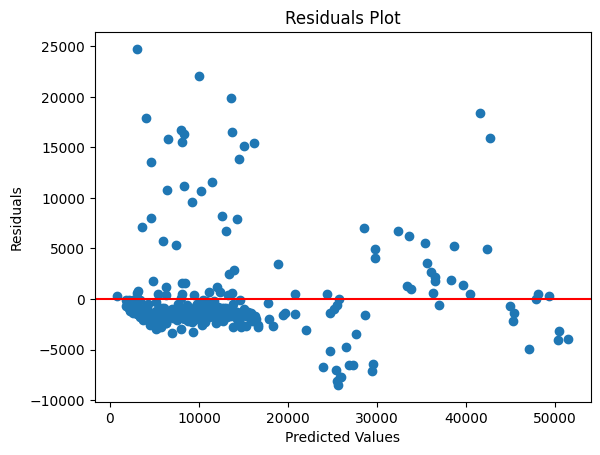

In [ ]:
residuals = y_test - y_pred

# Plot residuals against predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [ ]:
X_poly_train.shape

(1003, 78)

**Implementation of Polynomial Regression**

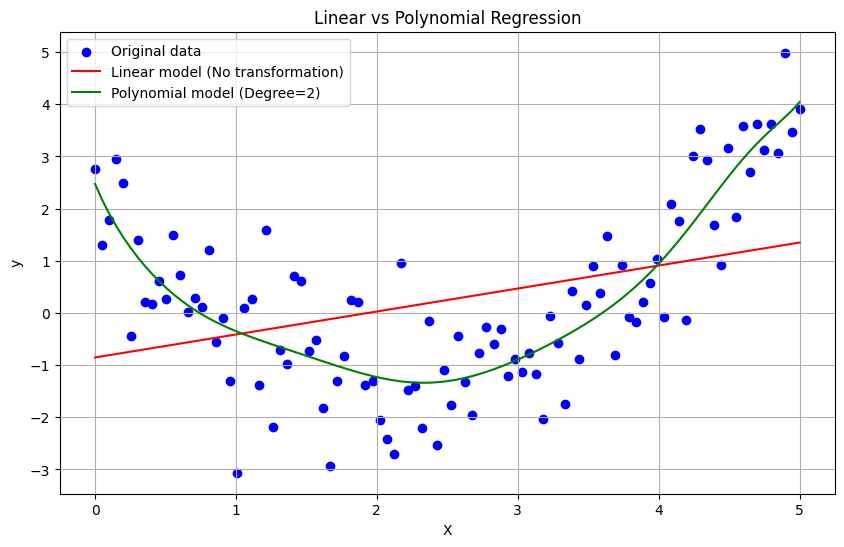

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate non-linear data
np.random.seed(0)
X = np.linspace(0, 5, 100)
y = 0.5 * X**2 - 2 * X + 1 + np.random.normal(0, 1, 100)

# Reshape X to be a column vector
X = X[:, np.newaxis]

# Fit a linear regression model
lin_model = LinearRegression()
lin_model.fit(X, y)
y_pred_linear = lin_model.predict(X)

# Polynomial transformation
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

# Fit a linear regression model with polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

# Plot original data and predictions
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Original data')
plt.plot(X, y_pred_linear, color='red', label='Linear model (No transformation)')
plt.plot(X, y_pred_poly, color='green', label='Polynomial model (Degree=2)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear vs Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()
